# 22. 지하철 노선을 카테고리로 처리
- 필요노선들, 기타

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/preprocessed/21_apart_name.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_27941/2505297082.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/21_apart_name.csv')


In [3]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타


In [4]:
df['호선'].unique()

array(['분당선', '3호선', '7호선', '신분당선', '신분당선(연장2)', '9호선(연장)', '2호선', '8호선',
       '5호선', '4호선', '우이신설선', '9호선', '경원선', '공항철도1호선', '신림선', '경인선',
       '경부선', '6호선', '1호선', '중앙선', '경의중앙선', '과천선', '일산선', '경춘선'],
      dtype=object)

In [5]:
categories = ['분당선', '3호선', '2호선', '5호선', '9호선']

In [7]:
for category in categories:
    df[category] = df['호선'].str.contains(category)

In [8]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,분당선,3호선,2호선,5호선,9호선
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,48.262095,17.693929,1.243615,70.059000,기타,True,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,48.262095,17.693929,1.243615,70.059000,기타,True,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,48.262095,17.693929,1.243615,70.059000,기타,True,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,46.647899,27.764117,2.459291,69.322000,기타,True,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,46.647899,27.764117,2.459291,69.322000,기타,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,45.212818,12.462049,-0.641286,50.938744,기타,False,False,False,False,False
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,45.212818,12.462049,-0.641286,50.938744,기타,False,False,False,False,False
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,45.056635,13.703570,-0.607676,50.991003,기타,False,False,False,False,False
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,44.744578,17.287617,-0.225827,51.082553,기타,False,False,False,False,False


In [9]:
# '기타' 카테고리 열 생성
df['기타'] = ~df[categories].any(axis=1)

In [10]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,분당선,3호선,2호선,5호선,9호선,기타
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,17.693929,1.243615,70.059000,기타,True,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,17.693929,1.243615,70.059000,기타,True,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,17.693929,1.243615,70.059000,기타,True,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,27.764117,2.459291,69.322000,기타,True,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,27.764117,2.459291,69.322000,기타,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,12.462049,-0.641286,50.938744,기타,False,False,False,False,False,True
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,12.462049,-0.641286,50.938744,기타,False,False,False,False,False,True
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,13.703570,-0.607676,50.991003,기타,False,False,False,False,False,True
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,17.287617,-0.225827,51.082553,기타,False,False,False,False,False,True


In [11]:
# '카테고리' 열을 범주형으로 변환
df['지하철 카테고리'] = df[categories+['기타']].idxmax(axis=1)

In [12]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,분당선,3호선,2호선,5호선,9호선,기타,지하철 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1.243615,70.059000,기타,True,False,False,False,False,False,분당선
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1.243615,70.059000,기타,True,False,False,False,False,False,분당선
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1.243615,70.059000,기타,True,False,False,False,False,False,분당선
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.459291,69.322000,기타,True,False,False,False,False,False,분당선
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.459291,69.322000,기타,True,False,False,False,False,False,분당선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,-0.641286,50.938744,기타,False,False,False,False,False,True,기타
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,-0.641286,50.938744,기타,False,False,False,False,False,True,기타
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,-0.607676,50.991003,기타,False,False,False,False,False,True,기타
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,-0.225827,51.082553,기타,False,False,False,False,False,True,기타


In [13]:
# 카테고리별 평균 실거래가 계산
category_mean_target = df.groupby('지하철 카테고리')['target'].mean().reset_index()
category_mean_target = category_mean_target.rename(columns={'target': '평균 실거래가'})

In [14]:
category_mean_target

,지하철 카테고리,평균 실거래가
0,2호선,68113.931349
1,3호선,84527.816349
2,5호선,54508.454287
3,9호선,75218.532447
4,기타,47461.560882
5,분당선,102218.254564


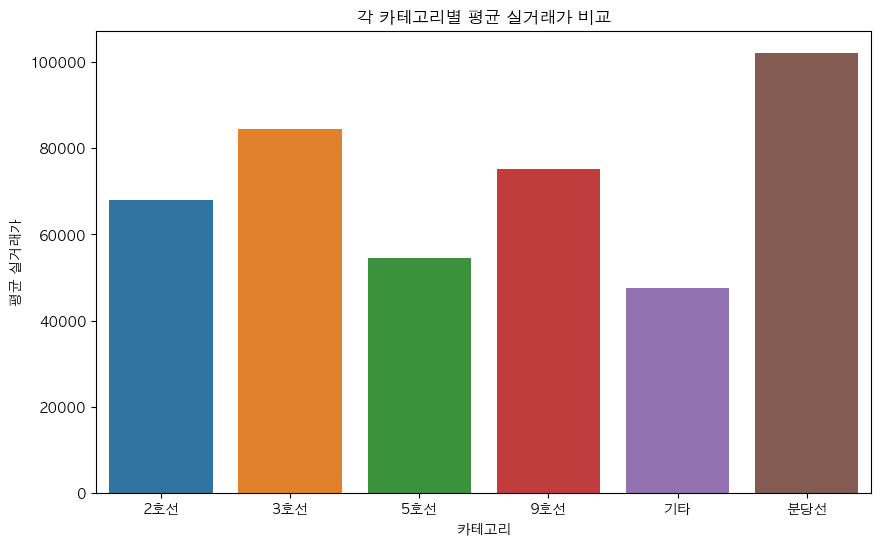

In [15]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='지하철 카테고리', y='평균 실거래가', data=category_mean_target)
plt.title('각 카테고리별 평균 실거래가 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 실거래가')
plt.show()

In [16]:
columns_to_drop = categories
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
df['지하철 카테고리']

0          분당선
1          분당선
2          분당선
3          분당선
4          분당선
          ... 
1128089     기타
1128090     기타
1128091     기타
1128092     기타
1128093     기타
Name: 지하철 카테고리, Length: 1128094, dtype: object

In [18]:
df['지하철 카테고리'].astype('category')

0          분당선
1          분당선
2          분당선
3          분당선
4          분당선
          ... 
1128089     기타
1128090     기타
1128091     기타
1128092     기타
1128093     기타
Name: 지하철 카테고리, Length: 1128094, dtype: category
Categories (6, object): ['2호선', '3호선', '5호선', '9호선', '기타', '분당선']

In [19]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,기타,지하철 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,False,분당선
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,False,분당선
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,False,분당선
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,False,분당선
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,False,분당선


In [20]:
df.drop(['기타'], axis=1, inplace=True)
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선


In [22]:
df.to_csv('../data/preprocessed/33_subway_line.csv', index=False)